In [1]:
#ttung102802@gmail.com
from google.colab import drive
from IPython.display import Image
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# **로지스틱회귀와 시그모이드함수**
-여러개의 입력과 하나의 절편을 받음

-산출한 z값을 활성화함수(시그모이드 함수)를 통해 0~1사이의 값으로 조정(확률로 변환)

-이후 산출된 확률 a를 역방향계산하여 가중치와 절편을 조절

-이후 확률의 절반인 0.5를 기준으로한 임계함수를 통해 y_hat값 산출(a>0.5이면 양성, a<=0.5이면 음성)

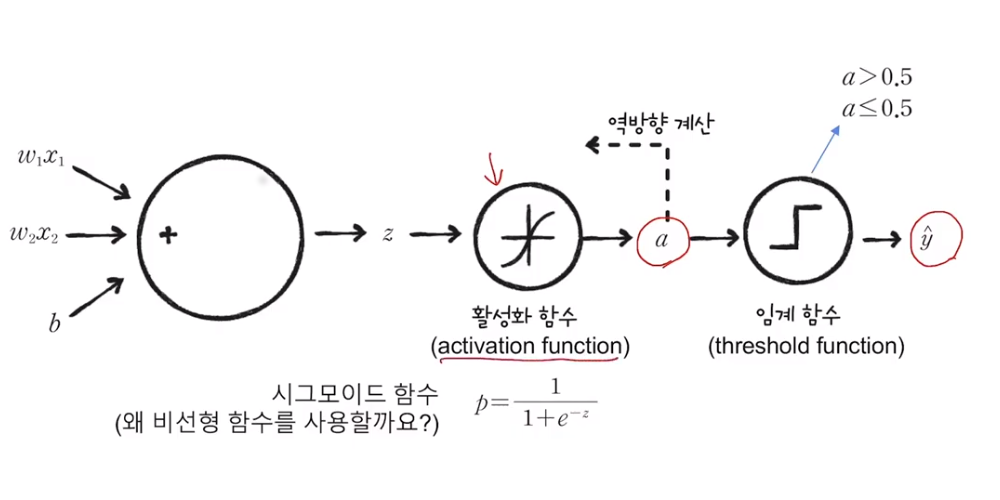

In [3]:
Image('/gdrive/My Drive/Colab Notebooks/do it 머신러닝/do_it_ML_img/4_1.png')
#z=b+sigma(w_i*x_i)

*분류의 정확도는 미분가능한 함수가 아니므로 로지스틱 회귀에서는 손실함수로 로지스틱함수(이진 크로스 엔트로피)를 사용합니다.

**L = -(y*log(a)+(1-y)log(1-a))** (y:타깃값(0또는 1), a:활성화함수의 출력값)

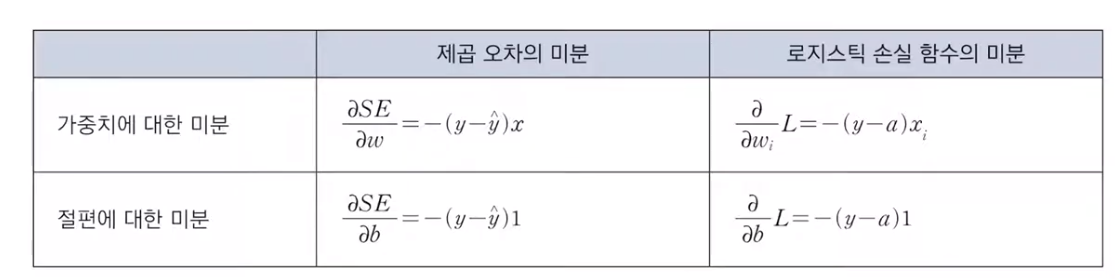

In [4]:
Image('/gdrive/My Drive/Colab Notebooks/do it 머신러닝/do_it_ML_img/4_2.png')
#아래와 같이 제곱오차의 미분의 형태와 동일함을 알 수 있다.

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [6]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

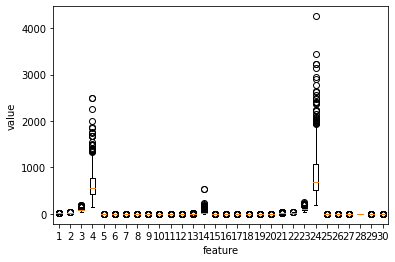

In [7]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [8]:
#numpy의 unique함수는 주어진 넘파이 배열의 고유한 값들만 뽑아준다.
#return_counts를 True로 설정하면 각 고유한 값들의 개수를 출력해준다.
np.unique(cancer.target, return_counts = True)
#이진 분류이기 때문에 데이터셋의 타깃값은 0과 1밖에 없는것을 볼 수 있다.
#아래에서 보는 바와 같이 음성데이터(0:양성종양)이 212개, 양성데이터(1:악성종양)이 357개임을 알 수 있다.

(array([0, 1]), array([212, 357]))

In [9]:
x = cancer.data
y = cancer.target

**훈련세트와 테스트세트 구분**

모델의 성능을 정확히 평가하기 위해 전체 데이터세트중 평가에 사용할 테스트세트만 따로 구분하도록한다.

In [10]:
#sklearn에서는 훈련세트와 테스트세트를 자동으로 나눠주는 모듈을 제공한다.
from sklearn.model_selection import train_test_split

#test_size:테스트세트의 비율 설정
#stratify:양성클래스와 음성클래스의 비율을 동일하게 유지
#random_state:난수 지정
x_train,x_test,y_train,y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=42)

In [11]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [12]:
print(y_train.shape,y_test.shape)

(455,) (114,)


**로지스틱 뉴런 구현하기**

In [16]:
class LogisticNeuron:
  def __init__(self):
    #로지스틱 뉴런에서는 가중치와 절편을 초기화하지 않는다.
    self.w = None
    self.b = None
  def forpass(self,x):
    #로지스틱 함수에선 입력값과 가중치가 모두 숫자 배열로 주어지므로 배열의 원소 각각을 연산해주는 np.sum메소드를 사용한다.*
    z = np.sum(x * self.w) + self.b
    return z
  def backdrop(self,x,err):
    #로지스틱 손실함수의 도함수가 제곱오차함수의 도함수와 거의 비슷하므로 역방향 계산함수 또한 선형회귀 뉴런과 크게 다름이 없음을 볼 수 있다.
    w_grade = x * err
    b_grade = 1 * err
    return w_grade, b_grade
  def fit(self, x, y, epoch=100):
    self.w = np.ones(x.shape) #x의 개수만큼의 크기를가진 가중치 배열 w를 모두 1로 초기화
    self.b = 0; #절편 초기화
    for i in range(epoch):
      for x_i,y_i in zip(x,y):
        z = self.forpass(x_i) #정방향 계산
        a = self.activation(z) #활성화 함수 계산
        err = -(y_i-a) #오차계산
        w_grade,b_grade = self.backdrop(x_i,err) #역방향 계산
        self.w -= w_grade #가중치 업데이트
        self.b -= b_grade #절편 업데이트
  def activation(self, z):
    z = np.clip(z, -100, None) #안전한 exp계산을 위한 np.clip메소드(np.clip(array,min,max):array안의 값을 min보다 작은 값은 min값으로, max보다 큰값은 max값으로 바꿔준다.)
    a = 1/(1+np.exp(-z)) #시그모이드 계산, np.exp는 지수함수(f(x)=e^x)
    return a
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x] #x의 요소에 선형계산을 각각 적용하여 출력값 z배열 생성
    a = self.activation(np.array(z)) #활성화함수 적용
    return a > 0.5 #계단함수 적용

In [14]:
neuron = LogisticNeuron()
neuron.fit(x_train,y_train)
np.mean(neuron.predict(x_test) == y_test)

0.8070175438596491

**로지스틱 회귀 뉴런으로 단일층 신경망 구현**

손실함수 저장 기능 구현하기

In [19]:
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [23]:
layer = SingleLayer()
layer.fit(x_train, y_train,epochs=200)
layer.score(x_test, y_test)

0.8508771929824561

사이킷 런의 경사하강법 사용

In [21]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [22]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])